In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
img_size = 224
data = []
categories = ['mammooty','mohanlal']

directories = ['./dataset/mammooty', './dataset/mohanlal']

for directory in directories:
    for img in os.listdir(directory):
        img_path = os.path.join(directory, img)
        category_label = directory.split('/')[-1]
        label = categories.index(category_label)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])
        
# Adds labels to images

In [3]:
random.shuffle(data)

In [4]:
x = []
y = []

for features, labels in data:
    x.append(features)
    y.append(labels)
    
# Seperating featuers and labels

In [5]:
x = np.array(x)
y = np.array(y)

# Array

In [6]:
x = x/255

# Normalisation

In [7]:
x.shape

(994, 224, 224, 3)

In [2]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D


# InceptionV3

In [9]:
from tensorflow.keras.applications import InceptionV3

inceptionv3 = InceptionV3(weights='./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                 include_top=False, input_shape=(224, 224, 3))

In [10]:
model = Sequential()
model.add(resnet)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22065185 (84.17 MB)
Trainable params: 22030753 (84.04 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [13]:
history = model.fit(x, y, epochs=10, validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 41s 1s/step - loss: 0.2635 - accuracy: 0.8881 - val_loss: 18.5481 - val_accuracy: 0.6734
Epoch 2/10
25/25 [==============================] - 29s 1s/step - loss: 0.1284 - accuracy: 0.9610 - val_loss: 15.7001 - val_accuracy: 0.6734
Epoch 3/10
25/25 [==============================] - 30s 1s/step - loss: 0.0073 - accuracy: 0.9987 - val_loss: 4.8519 - val_accuracy: 0.6784
Epoch 4/10
25/25 [==============================] - 29s 1s/step - loss: 0.0750 - accuracy: 0.9774 - val_loss: 0.1782 - val_accuracy: 0.9849
Epoch 5/10
25/25 [==============================] - 29s 1s/step - loss: 0.0138 - accuracy: 0.9975 - val_loss: 0.0902 - val_accuracy: 0.9950
Epoch 6/10
25/25 [==============================] - 29s 1s/step - loss: 0.0258 - accuracy: 0.9912 - val_loss: 0.2502 - val_accuracy: 0.9146
Epoch 7/10
25/25 [==============================] - 29s 1s/step - loss: 0.0472 - accuracy: 0.9836 - val_loss: 0.1314 - val_accuracy: 0.9799
Epoch 8/10
25/25 [

In [14]:
acc = model.evaluate(x,y)
print("Accuracy: ", (acc[1]*100))

32/32 [==============================] - 9s 285ms/step - loss: 0.0448 - accuracy: 0.9829
Accuracy:  98.2897400856018


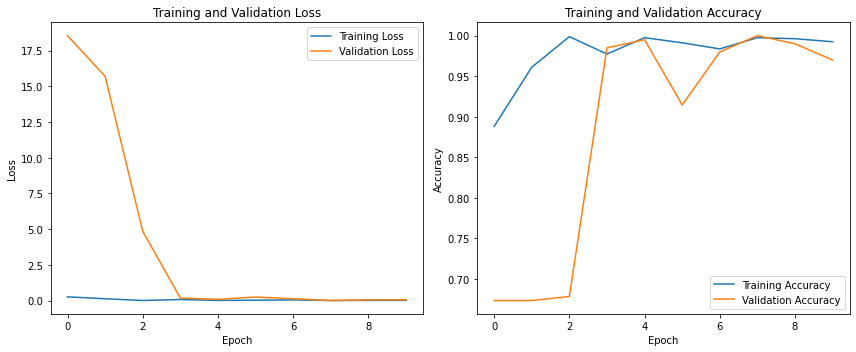

In [15]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
model.save('./InceptionV3.keras',save_format = 'h5')

In [18]:
model = load_model('InceptionV3.keras')

In [19]:
def load_image(path):
    img = cv2.imread(path)
    new_img = cv2.resize(img, (224,224))
    new_img = np.array(new_img)
    new_img = new_img.reshape(-1,224,224,3)
    return new_img

# Preprocessing user input image

1/1 [==============================] - 1s 935ms/step

 Prediction:  Mohanlal


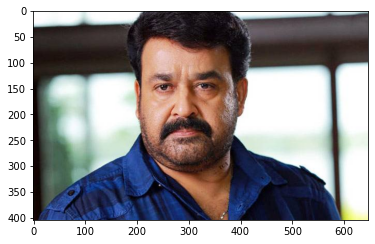

In [20]:
image = './test/mammooty.jpg'
image2 = './test/mohanlal.jpg'

img = image2

result = model.predict([load_image(img)])

if result[0][0] > 0.8:
    predict = 'Mohanlal'
else:
    predict = 'Mammooty'

print('\n Prediction: ',predict)
plt.imshow(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))